# needs work

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
# df = pd.read_csv('hotData.csv')
df = pd.read_csv('hotoutliers.csv')

In [4]:
y = df['results']
X = df.drop(columns=['results'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.10, random_state=2)

In [5]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42
)

In [6]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_train)
y_2 = regr_2.predict(X_train)

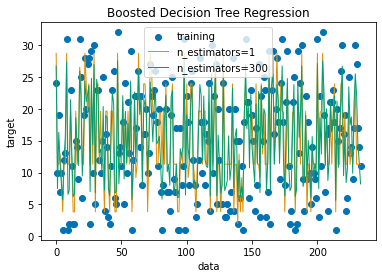

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train=np.arange(0,len(X_train),1)

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X_train, y_train, color=colors[0], label="training")
plt.plot(X_train, y_1, color=colors[1], label="n_estimators=1", linewidth=1)
plt.plot(X_train, y_2, color=colors[2], label="n_estimators=300", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [9]:
y_pred = regr_2.predict(X_test)

In [10]:
print('r2 score: '+str(r2_score(y_test, y_pred)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MSE: '+str(mean_squared_error(y_test, y_pred)))
print('MAE: '+str(mean_absolute_error(y_test, y_pred)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.526329837492642
RMSE : 4.640147791707152
MSE: 21.53097152888476
MAE: 3.8237103556498018
MAPE: 0.5059212035623379


In [11]:


# MAPE: 0.865648039342862

In [12]:
data = {'y_test': y_test, 'y_pred': y_pred}
new_df = pd.DataFrame(data)
diff = (new_df['y_test'] - (new_df['y_pred'])).abs()
new_df['diff'] = diff
new_df = new_df.sort_values(by='diff', ascending=True)

In [13]:
new_df

,y_test,y_pred,diff
115,9,8.567010,0.432990
41,15,15.636364,0.636364
66,12,11.324324,0.675676
245,7,7.715909,0.715909
94,12,13.000000,1.000000
10,6,7.313131,1.313131
3,6,8.347826,2.347826
77,17,19.400000,2.400000
30,22,19.357143,2.642857
156,27,24.333333,2.666667


In [12]:
df.columns

Index(['goals', 'xg', 'crosses', 'boxtouches', 'passes', 'progpasses',
       'takeons', 'progruns', 'tackles', 'interceptions', 'clearances',
       'blocks', 'aerials', 'fouls', 'fouled', 'nsxg', 'results', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
       '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73'],
      dtype='object')